# Bix Tecnologia


Fonte: https://docs.google.com/spreadsheets/d/1Sc6hN48b-lWbDdYNd_t9j8Bt0EZ8BUNG/edit?pli=1#gid=693918541

# Initial imports

In [ ]:
%pip install ipython-autotime  --upgrade

In [ ]:
from google.colab import drive, files
import pandas as pd
drive.mount('/content/drive', force_remount=True)
%load_ext autotime

In [ ]:
clients = pd.read_csv("/content/drive/MyDrive/datasets/bix-tecnologia/clients.csv", encoding='utf-8')
clients['DateOfBirth'] = pd.to_datetime(clients['DateOfBirth'], format="%m/%d/%Y")

products  = pd.read_csv("/content/drive/MyDrive/datasets/bix-tecnologia/products.csv", encoding='utf-8')

sales = pd.read_csv("/content/drive/MyDrive/datasets/bix-tecnologia/sales.csv", encoding='utf-8', skiprows=4)
sales = sales[['ID', 'StoreID', 'ProductID', 'ClientID','Discount', 'UnitPrice', 'Quantity', 'Date']]
sales['Date'] = pd.to_datetime(sales['Date'], format="%m/%d/%Y")

stores    = pd.read_csv("/content/drive/MyDrive/datasets/bix-tecnologia/stores.csv", encoding='utf-8')

time: 1.27 s (started: 2023-07-09 17:45:18 +00:00)


Vou renomear as colunas para ficar mais legível e poder unir os dataframes com a função merge() formando apenas um dataset.

In [ ]:
clients = clients.rename(columns={'ID':'client_id', 'City':'client_city', 'State':'client_state', 'DateOfBirth':'client_birth', 'Sex':'client_gender'})
products = products.rename(columns={'ID':'product_id', 'Name':'product_name', 'Size':'product_size'})
sales = sales.rename(columns={'ID':'id', 'ProductID':'product_id', 'ClientID':'client_id', 'Discount':'discount', 'UnitPrice':'unit_price', 'Quantity':'quantity', 'StoreID':'store_id', 'Date':'date'})
stores = stores.rename(columns={'ID':'store_id', 'Name':'store_city', 'State':'store_state'})

time: 3.78 ms (started: 2023-07-09 17:45:19 +00:00)


Agora, vou criar um único dataframe com todos os arquivos. Além disso, vou reordenar as colunas para legibilidade.

In [ ]:
dataset = sales.merge(stores, on='store_id')
dataset = dataset.merge(products, on='product_id')
dataset = dataset.merge(clients, on='client_id')

#dataset = dataset.drop(['id', 'store_id', 'product_id', 'client_id'], axis=1)
dataset = dataset[['date', 'store_city', 'store_state', 'product_name', 'product_size', 'client_city', 'client_state', 'client_birth', 'client_gender', 'discount', 'unit_price', 'quantity', 'id', 'store_id', 'product_id', 'client_id']]

time: 53.7 ms (started: 2023-07-09 17:45:19 +00:00)


# EDA

A única transformação de dados que farei nessa fase será a de tipo pois vai facilitar a análise exploratória.

In [ ]:
import numpy as np

time: 234 µs (started: 2023-07-09 17:45:19 +00:00)


In [ ]:
dataset.head()

,date,store_city,store_state,product_name,product_size,client_city,client_state,client_birth,client_gender,discount,unit_price,quantity,id,store_id,product_id,client_id
0,2018-12-10,Curitiba,PR,Tempestade,G,Curitiba,PR,1985-06-28,Homem,"0,08","249,2",1,80260d682079b6090c8285b398c50d97,4,002552c0663708129c0019cc97552d7d3,14001
1,2019-04-25,Curitiba,PR,Thanos,G,Curitiba,PR,1985-06-28,Homem,"0,1","162,4",1,3275736da1234f55d52bdf09d86b93bc,4,001b237c0e9bb435f2e54071129237e93,14001
2,2019-07-17,Curitiba,PR,Capitão América,P,Curitiba,PR,1985-06-28,Homem,"0,1","194,6",1,f3513eec8f1434b5b7e04ddf3598df40,4,00066f42aeeb9f3007548bb9d3f33c381,14001
3,2018-12-03,Curitiba,PR,Tempestade,G,Curitiba,PR,1987-10-21,Homem,"0,08","249,2",1,c330b70c5e60bf56e90ebe09e045f79e,4,002552c0663708129c0019cc97552d7d3,14116
4,2018-04-29,Curitiba,PR,Bazinga,G,Curitiba,PR,1987-10-21,Homem,"0,1","218,4",2,eced501ea6ea98469acff0ccbf3ca09b,4,002ec297b1b00fb9dde7ee6ac24b67713,14116


time: 12.5 ms (started: 2023-07-09 17:45:19 +00:00)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32753 entries, 0 to 32752
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           32753 non-null  datetime64[ns]
 1   store_city     32753 non-null  object        
 2   store_state    32753 non-null  object        
 3   product_name   32753 non-null  object        
 4   product_size   32753 non-null  object        
 5   client_city    32753 non-null  object        
 6   client_state   32753 non-null  object        
 7   client_birth   32753 non-null  datetime64[ns]
 8   client_gender  32753 non-null  object        
 9   discount       32753 non-null  object        
 10  unit_price     32753 non-null  object        
 11  quantity       32753 non-null  int64         
 12  id             32753 non-null  object        
 13  store_id       32753 non-null  int64         
 14  product_id     32753 non-null  object        
 15  client_id      3275

Os atributos 'discount' e 'unit_price' são números, mas estão definidos como 'object'. Isso acontece porque os números contém vírgula e não ponto. Vou mudar seus tipos para que eu possa criar os gráficos de maneira adequada.

In [ ]:
dataset['discount']   = np.vectorize(lambda x: x.replace(',', '.'))(dataset['discount'])
dataset['unit_price'] = np.vectorize(lambda x: x.replace(',', '.'))(dataset['unit_price'])
dataset = dataset.astype({'discount': 'float64'})
dataset = dataset.astype({'unit_price': 'float64'})

time: 41.3 ms (started: 2023-07-09 17:45:19 +00:00)


Crio duas listas contendo os atributos categóricos e numéricos. Inicialmente, ignorei datas e ids.

In [ ]:
categorical = ['store_city', 'store_state', 'product_name', 'product_size', 'client_city', 'client_state', 'client_gender']
numerical   = ['discount', 'unit_price', 'quantity']

time: 559 µs (started: 2023-07-09 17:45:19 +00:00)


In [ ]:
dataset[numerical].describe()

,discount,unit_price,quantity
count,32753.000000,32753.000000,32753.000000
mean,0.093012,221.644967,1.058651
std,0.009536,112.535304,0.239606
min,0.080000,114.800000,1.000000
25%,0.080000,161.000000,1.000000
50%,0.100000,204.400000,1.000000
75%,0.100000,233.800000,1.000000
max,0.100000,686.000000,3.000000


time: 20.9 ms (started: 2023-07-09 17:45:19 +00:00)


Verificando a quantidade de valores únicos cada atributo categórico tem.

In [ ]:
for name in categorical:
  print(f'{name}: {dataset[name].nunique()}')

store_city: 7
store_state: 7
product_name: 24
product_size: 4
client_city: 123
client_state: 18
client_gender: 2
time: 18.6 ms (started: 2023-07-09 17:45:19 +00:00)


Agora, vou ver quais são.

In [ ]:
for name in categorical:
  print(f'{name}:\n {dataset[name].value_counts()}\n')

store_city:
 Florianópolis     8230
Rio de Janeiro    6838
Porto Alegre      6167
Curitiba          5172
São Paulo         3588
Belo Horizonte    1845
Online             913
Name: store_city, dtype: int64

store_state:
 SC    8230
RJ    6838
RS    6167
PR    5172
SP    3588
MG    1845
na     913
Name: store_state, dtype: int64

product_name:
 Iron Man               1420
League Legends         1403
Capitã Marvel          1399
Thanos                 1388
Ciclope                1386
Homer Simpsons         1382
Super Mario            1381
Bazinga                1380
Deadpool               1378
Batman                 1373
Wolverine              1372
Coringa                1369
Dragon Ball Z          1366
Flash                  1363
Pokemon Go Squirtle    1362
Mulher-Maravilha       1359
Rick Morty             1358
Darth Vader            1357
BIXDream               1347
Thor                   1333
Capitão América        1331
Pantera Negra          1323
Tempestade             1318
Naruto     

Verificando se há valores nulos no conjunto de dados.

In [ ]:
for name in dataset.columns:
  print(f'{name}: {dataset[name].isnull().sum()}')

date: 0
store_city: 0
store_state: 0
product_name: 0
product_size: 0
client_city: 0
client_state: 0
client_birth: 0
client_gender: 0
discount: 0
unit_price: 0
quantity: 0
id: 0
store_id: 0
product_id: 0
client_id: 0
time: 28.4 ms (started: 2023-07-09 17:45:19 +00:00)


Esse resultado não está inteiramente correto. Pude ver antes que 'store_state' possui valores 'na', mas estãos sendo reconhecidos pelo Pandas como string. Vou corrigir isso.

In [ ]:
dataset = dataset.replace('na', np.nan)

time: 9.24 ms (started: 2023-07-09 17:45:19 +00:00)


In [ ]:
for name in dataset.columns:
  print(f'{name}: {dataset[name].isnull().sum()}')

date: 0
store_city: 0
store_state: 913
product_name: 0
product_size: 0
client_city: 0
client_state: 0
client_birth: 0
client_gender: 0
discount: 0
unit_price: 0
quantity: 0
id: 0
store_id: 0
product_id: 0
client_id: 0
time: 26.6 ms (started: 2023-07-09 17:45:19 +00:00)


Vou ver quais são as datas da primeira e última compra.

In [ ]:
print(dataset['date'].min())
print(dataset['date'].max())

2018-03-01 00:00:00
2020-01-31 00:00:00
time: 1.38 ms (started: 2023-07-09 17:45:19 +00:00)


## Data visualization

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette()
%matplotlib inline

time: 626 ms (started: 2023-07-09 17:45:19 +00:00)


O gráfico abaixo mostra a distribuição de clientes por gênero.

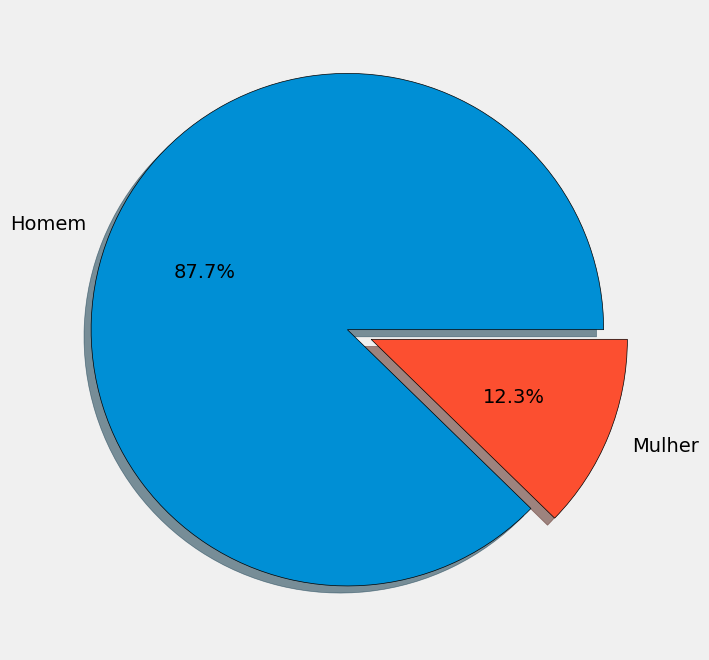

time: 189 ms (started: 2023-07-09 17:45:20 +00:00)


In [ ]:
classes = dataset.groupby('client_gender')['client_id'].nunique()
slices = classes.to_numpy().ravel()
labels = classes.index.to_list()
explode = [0, 0.1] # se houver mais de duas classes, adicionar valores na lista
plt.style.use("fivethirtyeight")
plt.figure(figsize=(7, 7))
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, autopct='%1.1f%%', shadow=True)
plt.tight_layout()
plt.show()

Qual o tamanho de produto mais vendido?

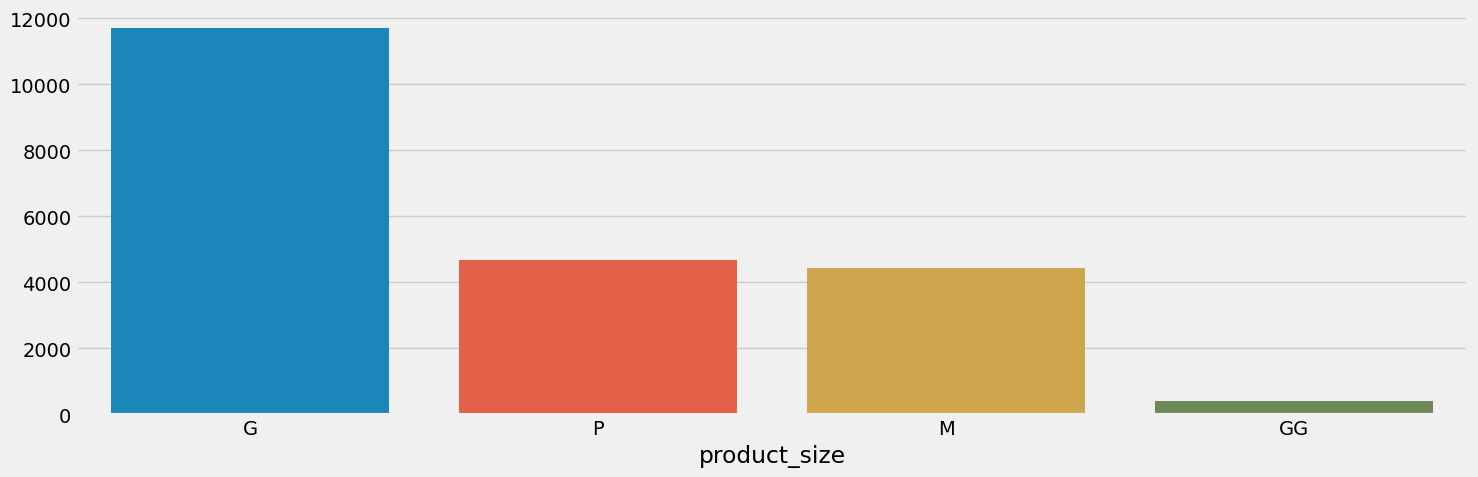

time: 383 ms (started: 2023-07-09 17:45:20 +00:00)


In [ ]:
classes = dataset.groupby('product_size')['client_id'].nunique()
classes = classes.sort_values(ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x=classes.index, y=classes.values)
plt.tight_layout()
plt.show()

Proporção de homens e mulheres por tamanho de produto.

<function matplotlib.pyplot.show(close=None, block=None)>

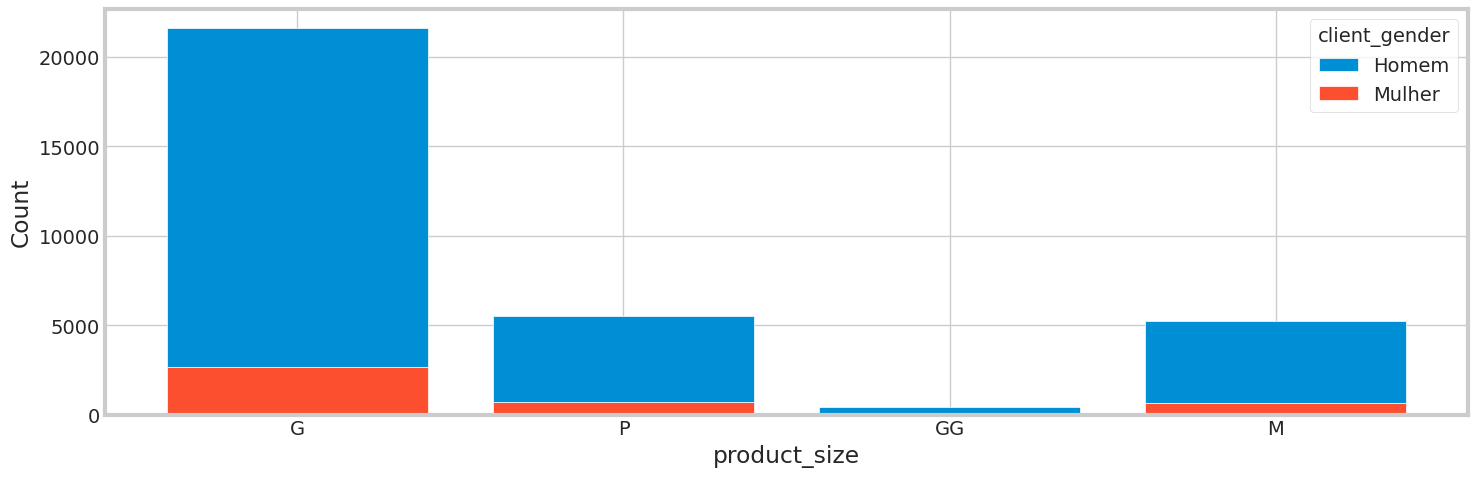

time: 327 ms (started: 2023-07-09 19:33:43 +00:00)


In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data=dataset, x='product_size', hue='client_gender', alpha=1.0, multiple='stack', shrink=0.8)
plt.tight_layout()
plt.show

Quais são os produtos mais vendidos por gênero de cliente?

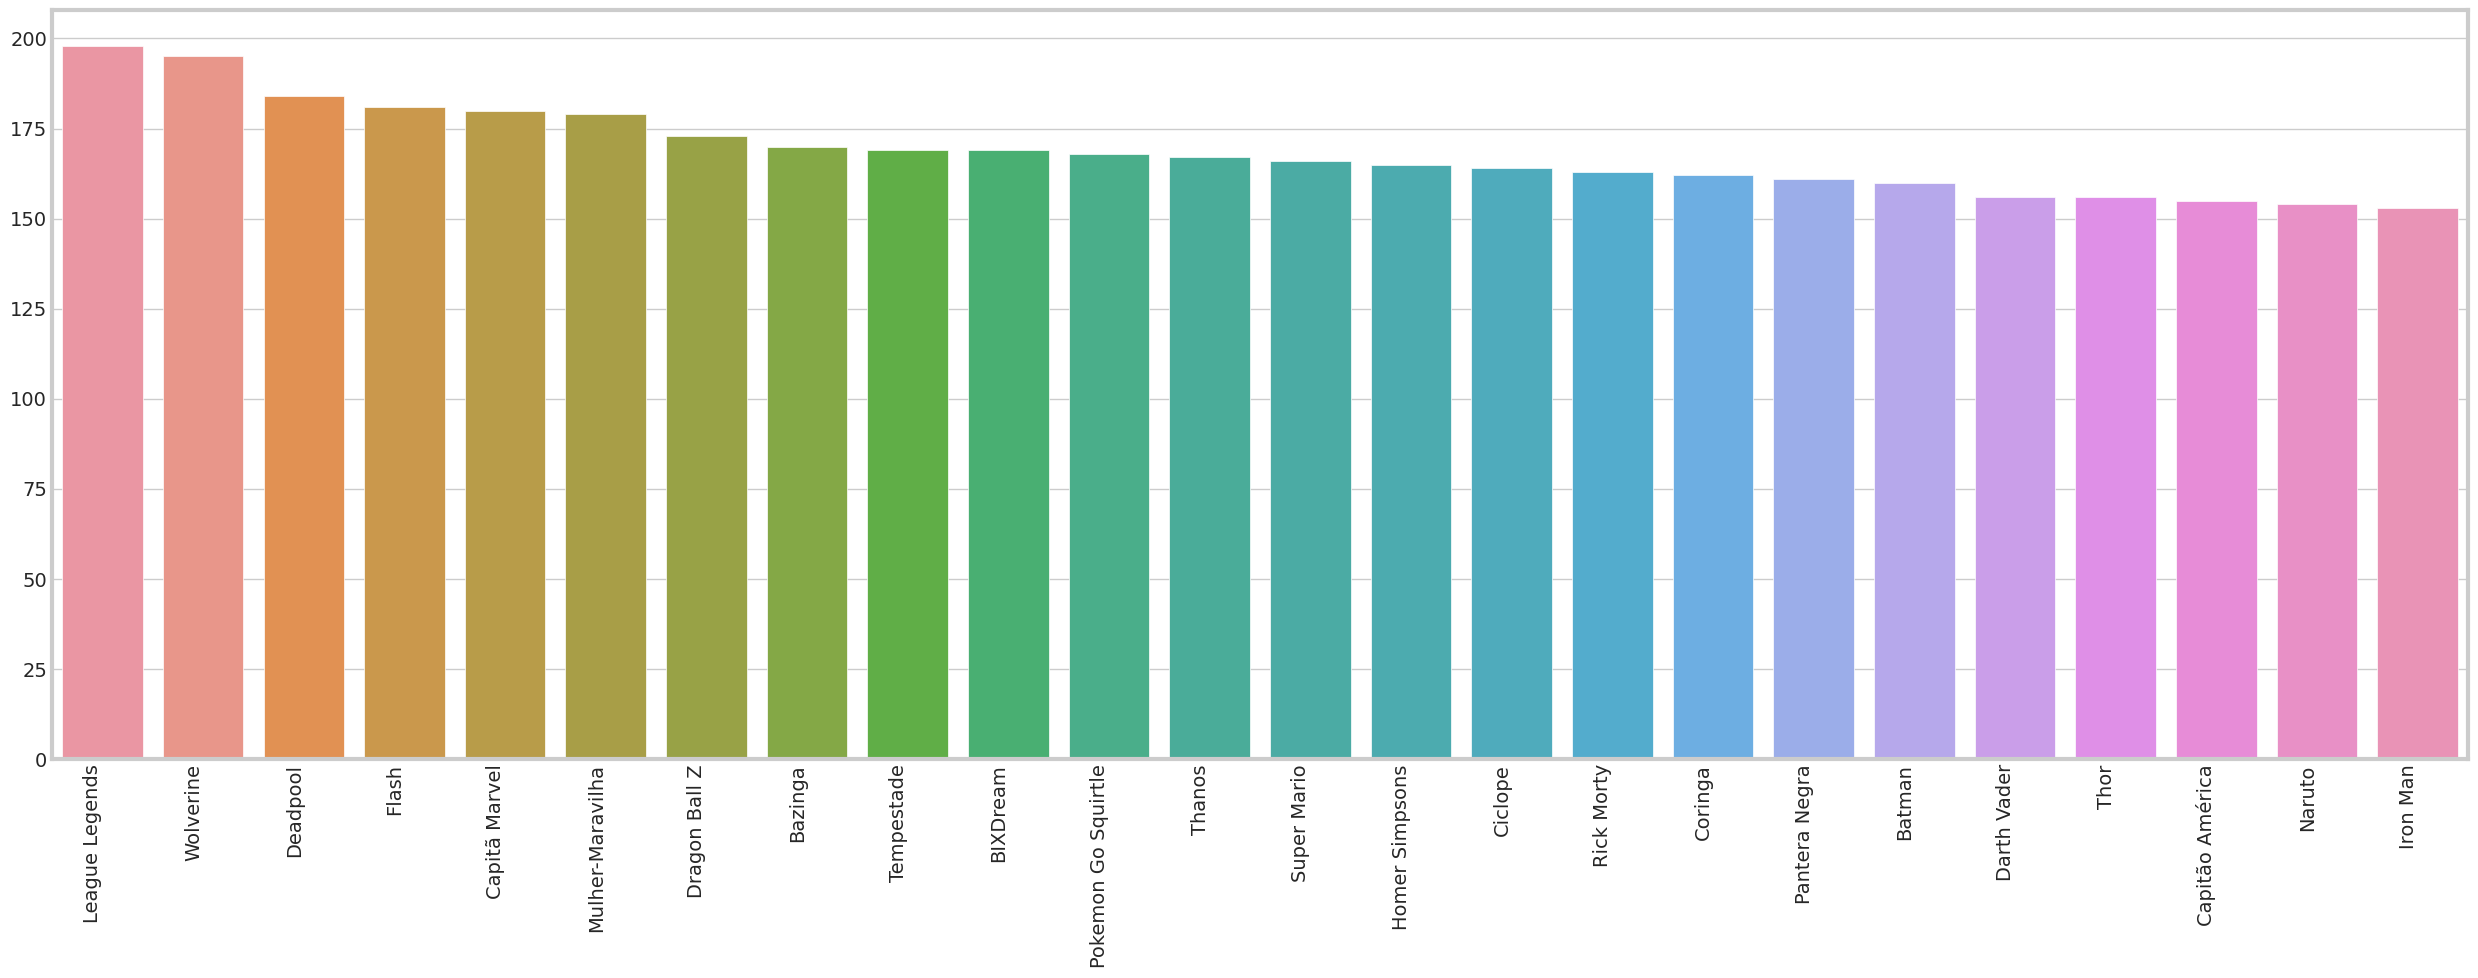

time: 850 ms (started: 2023-07-09 18:43:33 +00:00)


In [ ]:
mask = dataset['client_gender'] == 'Mulher'
df = dataset[mask]
classes = df['product_name'].value_counts()

plt.figure(figsize=(25, 10))
axis = sns.barplot(x=classes.index, y=classes.values)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

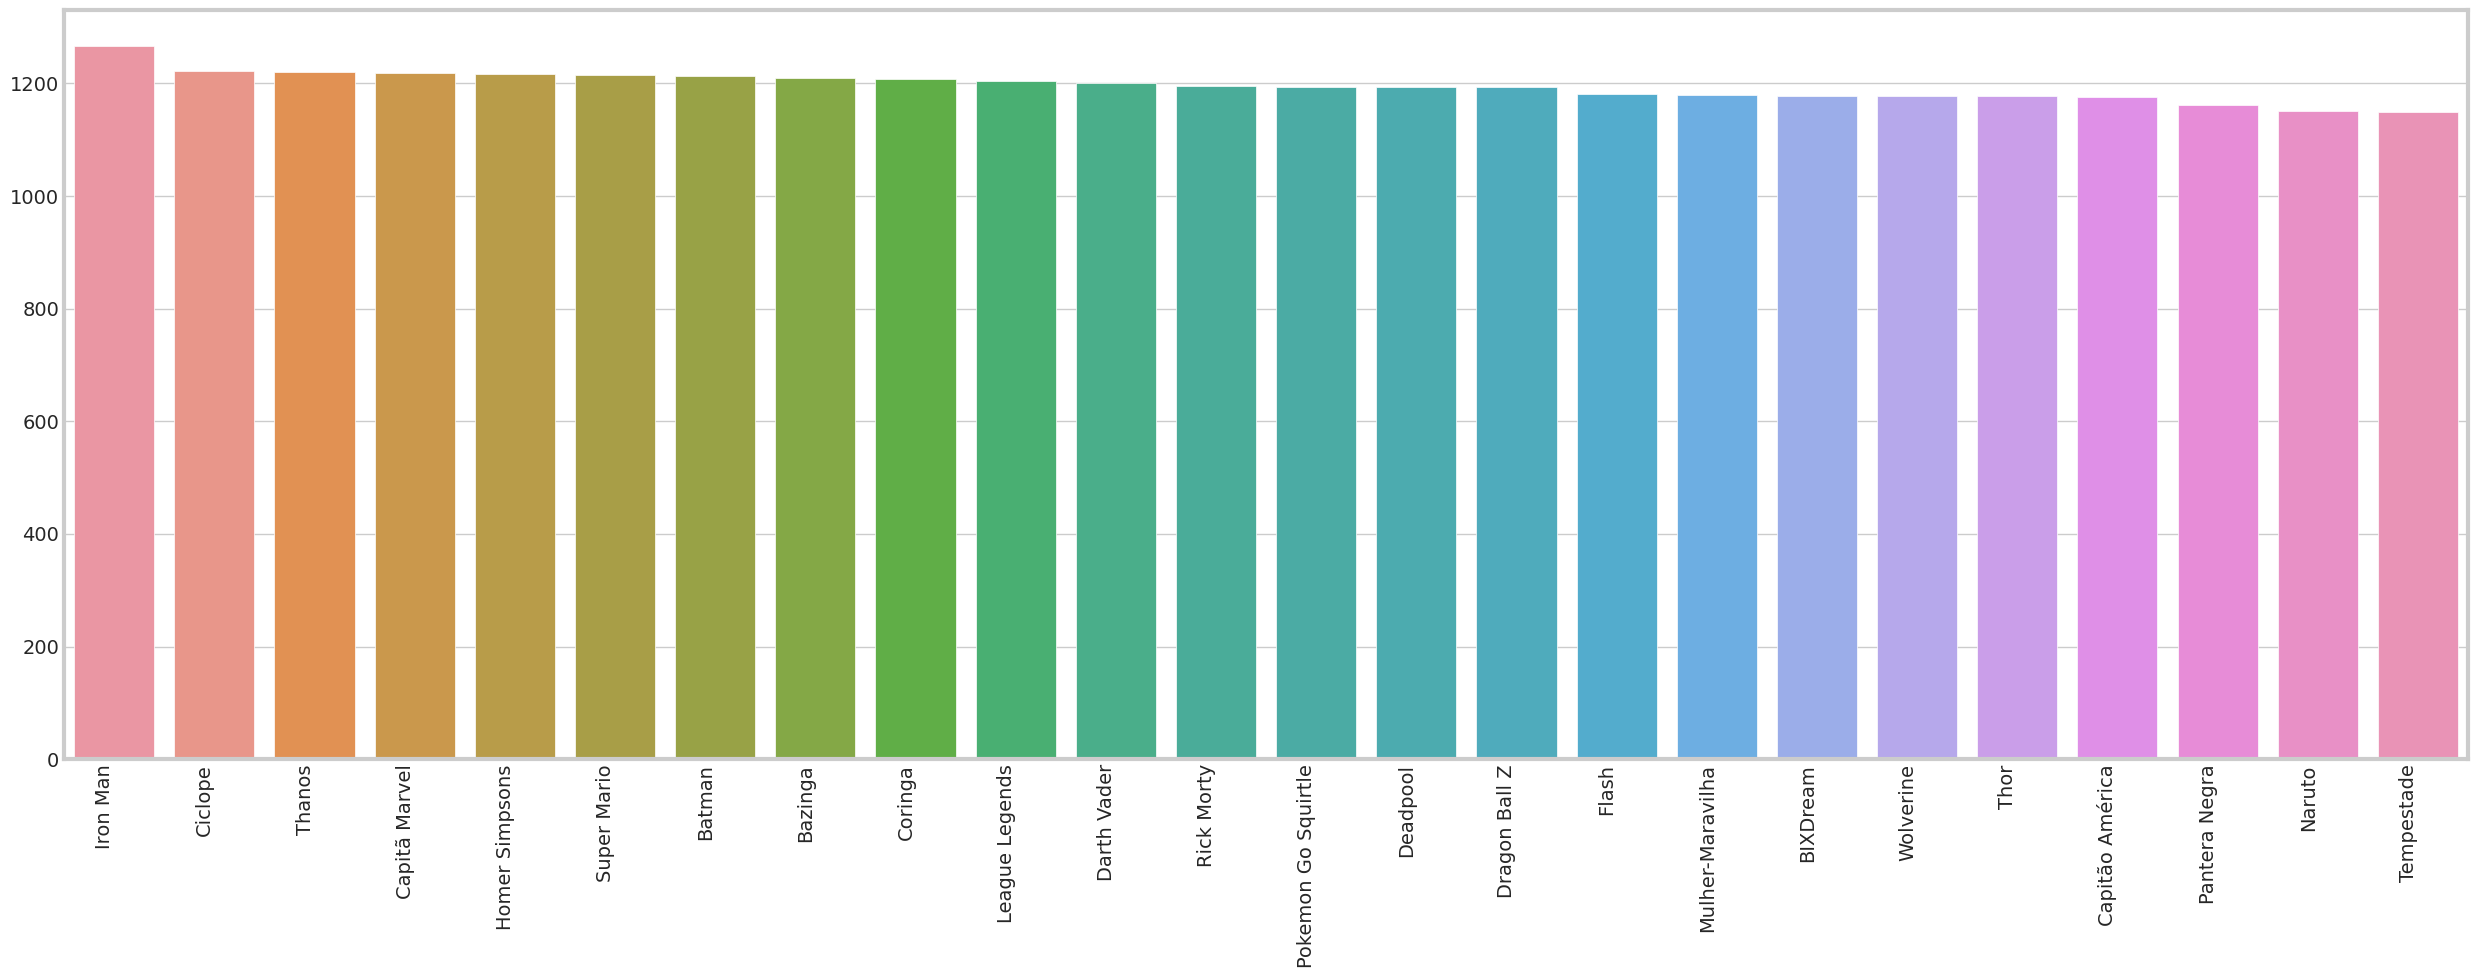

time: 749 ms (started: 2023-07-09 18:43:54 +00:00)


In [ ]:
mask = dataset['client_gender'] == 'Homem'
df = dataset[mask]
classes = df['product_name'].value_counts()

plt.figure(figsize=(25, 10))
axis = sns.barplot(x=classes.index, y=classes.values)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Em quais estados moram os clientes que mais compram?

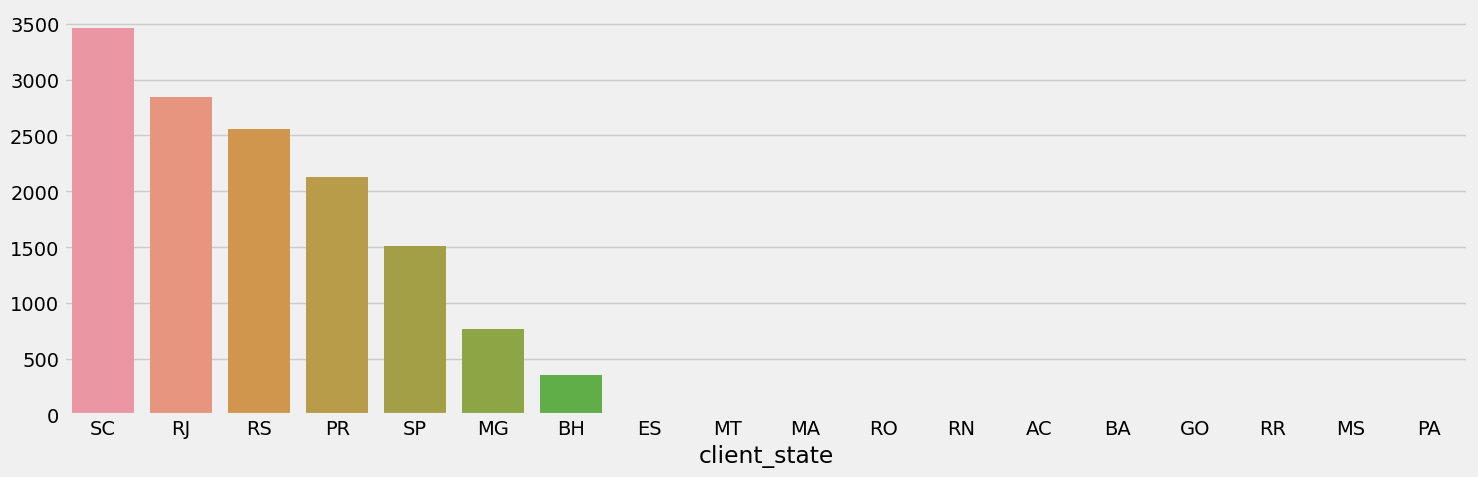

time: 275 ms (started: 2023-07-09 17:45:21 +00:00)


In [ ]:
classes = dataset.groupby('client_state')['client_id'].nunique()
classes = classes.sort_values(ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x=classes.index, y=classes.values)
plt.tight_layout()
plt.show()

Quais as idades dos clientes?

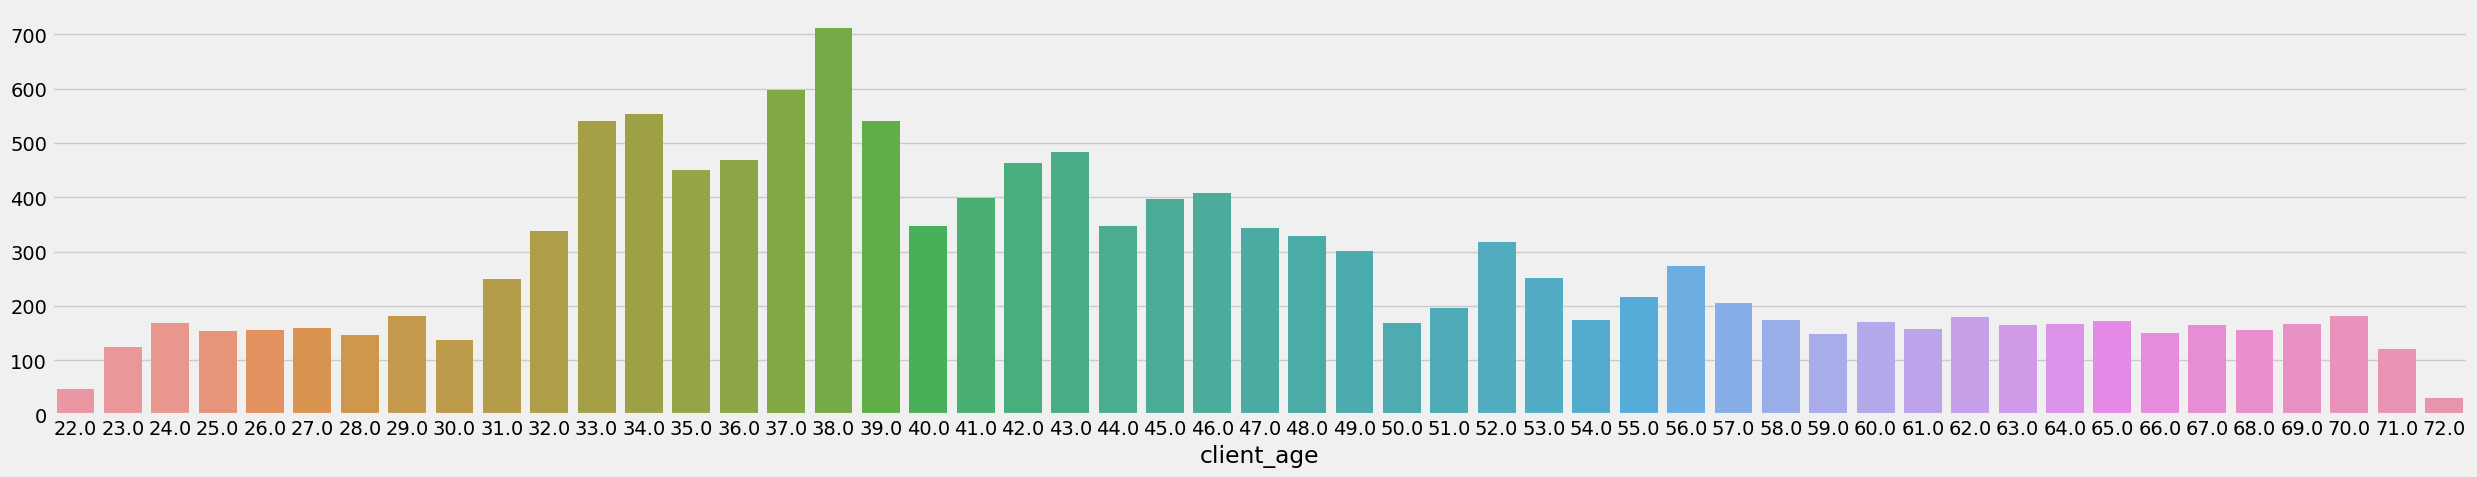

time: 471 ms (started: 2023-07-09 17:45:21 +00:00)


In [ ]:
dataset['client_age'] = (datetime.now() - dataset['client_birth']).astype('<m8[Y]')
classes = dataset.groupby('client_age')['client_id'].nunique()

plt.figure(figsize=(25, 5))
sns.barplot(x=classes.index, y=classes.values)
plt.tight_layout()
plt.show()

In [ ]:
dataset.head()

,date,store_city,store_state,product_name,product_size,client_city,client_state,client_birth,client_gender,discount,unit_price,quantity,id,store_id,product_id,client_id,client_age
0,2018-12-10,Curitiba,PR,Tempestade,G,Curitiba,PR,1985-06-28,Homem,0.08,249.2,1,80260d682079b6090c8285b398c50d97,4,002552c0663708129c0019cc97552d7d3,14001,38.0
1,2019-04-25,Curitiba,PR,Thanos,G,Curitiba,PR,1985-06-28,Homem,0.10,162.4,1,3275736da1234f55d52bdf09d86b93bc,4,001b237c0e9bb435f2e54071129237e93,14001,38.0
2,2019-07-17,Curitiba,PR,Capitão América,P,Curitiba,PR,1985-06-28,Homem,0.10,194.6,1,f3513eec8f1434b5b7e04ddf3598df40,4,00066f42aeeb9f3007548bb9d3f33c381,14001,38.0
3,2018-12-03,Curitiba,PR,Tempestade,G,Curitiba,PR,1987-10-21,Homem,0.08,249.2,1,c330b70c5e60bf56e90ebe09e045f79e,4,002552c0663708129c0019cc97552d7d3,14116,35.0
4,2018-04-29,Curitiba,PR,Bazinga,G,Curitiba,PR,1987-10-21,Homem,0.10,218.4,2,eced501ea6ea98469acff0ccbf3ca09b,4,002ec297b1b00fb9dde7ee6ac24b67713,14116,35.0


time: 11.4 ms (started: 2023-07-09 17:45:21 +00:00)


Quantos produtos únicos foram vendidos?

In [ ]:
dataset['product_id'].nunique()

73

time: 7.62 ms (started: 2023-07-09 20:20:58 +00:00)


Qual o produto mais vendido e quantos desse produto foram vendidos?

In [ ]:
result = dataset.groupby(['product_name', 'product_size'])['quantity'].sum()
result.sort_values(ascending=False)

product_name   product_size
Bazinga        G               1020
Iron Man       G               1018
Deadpool       G                998
Capitã Marvel  G                996
Flash          G                996
                               ... 
Coringa        M                216
Naruto         M                214
Tempestade     M                214
Thor           M                211
Thanos         M                201
Name: quantity, Length: 73, dtype: int64

time: 38.8 ms (started: 2023-07-09 20:26:12 +00:00)


Considerando o ano de 2019, qual gráfico abaixo mais se parece à quantidade mensal do vendida do produto "Iron Man, G" ?

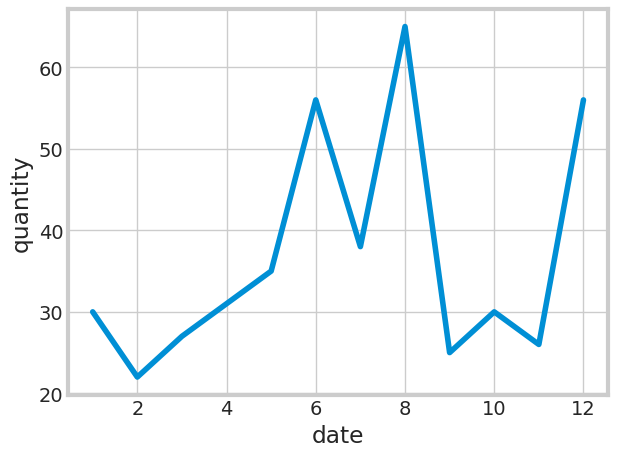

time: 422 ms (started: 2023-07-09 20:38:08 +00:00)


In [ ]:
mask = (dataset['date'].dt.year == 2019) & (dataset['product_name'] == 'Iron Man') & (dataset['product_size'] == 'G')
df = dataset[mask]
sales = df.groupby(df['date'].dt.month)['quantity'].sum()
sns.lineplot(sales)
plt.tight_layout()
plt.show()

Considerando a receita líquida mensal de vendas em 2019. Quais os valores de: média, mediana e desvio padrão desses valores?

In [ ]:
mask = (dataset['date'].dt.year == 2019)
df = dataset[mask]

df = df.copy()
df['paid'] = (df['quantity'] * df['unit_price']) - (df['quantity'] * df['unit_price'] * df['discount'])
revenue = df.groupby(df['date'].dt.month)['paid'].sum()
revenue.agg(['mean', 'median', 'std'])

mean      294265.094667
median    257390.910000
std        99304.561130
Name: paid, dtype: float64

time: 19.2 ms (started: 2023-07-09 20:56:21 +00:00)


Ainda considerando os dados de receita líquida de vendas em 2019, seu time deve focar esforços em uma das lojas para criar análises mais profundas e a primeira versão do modelo preditivo. Qual destas lojas você escolheria para prosseguir com o projeto?

In [ ]:
df['store_id'].value_counts()

1     3750
2     3048
3     2814
4     2304
7     1602
9      823
22     427
Name: store_id, dtype: int64

time: 3.89 ms (started: 2023-07-09 21:05:52 +00:00)


In [ ]:
mask = df['store_id'] == 1
df.loc[mask]['store_city'].value_counts()

Florianópolis    3750
Name: store_city, dtype: int64

time: 7.14 ms (started: 2023-07-09 21:11:27 +00:00)


Suponha que após realizar todas as etapas necessárias, seu time chegou em alguns modelos de forecasting para o volume mensal de vendas. Foram conduzidos alguns experimentos e os resultados de diferentes valores de erro percentual médio (MAPE) são apresentados abaixo. Dos resultados abaixo, qual o mais razoável que você escolheria para colocar o modelo em produção no ambiente do cliente?

Escolhei os 7 estados que mais vendem produtos para ver o ranking das cidades de cada um deles.

<ipython-input-152-cff46b9f6078>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")
<ipython-input-152-cff46b9f6078>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")
<ipython-input-152-cff46b9f6078>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")
<ipython-input-152-cff46b9f6078>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")
<ipython-input-152-cff46b9f6078>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")
<ipython-input-152-cff46b9f6078>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.

<function matplotlib.pyplot.show(close=None, block=None)>

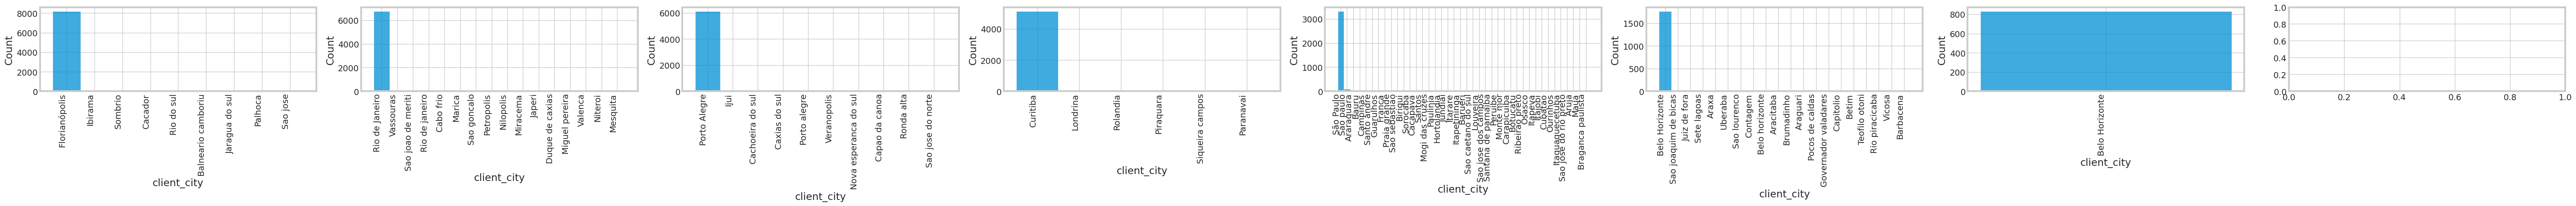

time: 2.71 s (started: 2023-07-09 20:05:10 +00:00)


In [ ]:
states = ['SC', 'RJ', 'RS', 'PR', 'SP', 'MG', 'BH']
fig, axis = plt.subplots(1, 8, figsize=(60, 5))
for state, x in zip(states, axis.ravel()):
  mask = dataset['client_state'] == state
  df = dataset[mask]
  sns.histplot(data=df, x='client_city', ax=x)
  x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show

# Train/Test split

time: 21.5 ms (started: 2023-07-09 17:45:21 +00:00)


# Feature engineering

time: 28.5 ms (started: 2023-07-09 17:45:21 +00:00)


# Model training

time: 33.9 ms (started: 2023-07-09 17:45:21 +00:00)
